In [2]:
import pandas as pd
import numpy as np
import tweepy
import time
import json
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

consumer_key = "MNtExuoBogl1cSCgbTg99axOn"
consumer_secret = "92ujLKA6rRo2hmYT5RUtFJWE7AcTY7rFNzdzSZwXN1yKAX5cfO"
access_token = "839884351219335169-wjwPEHm50YcZ2NRwdfsiEYVeJ2lNOq5"
access_token_secret = "Y2MlUCFEH6qP0x2eXE7FfD53B7Bp48UzUKBbRbhx0vbR3"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [3]:
target_list = ['@FoxNews', '@BBCWorld', '@CBSNews', '@nytimes', '@CNN']
df = {}

In [4]:
main_list = []

for target in target_list:
    sentiments = []
    counter = 1
    public_tweets = tweepy.Cursor(api.user_timeline, id=target, tweet_mode = "extended").items(100) 
    
    for tweet in public_tweets:
        tweet_text = json.dumps(tweet._json, indent=3)
        tweet = json.loads(tweet_text)
        sentiments.append({"Date": tweet["created_at"], 
                       "Compound": analyzer.polarity_scores(tweet["full_text"])["compound"],
                       "Tweets Ago": counter})
        main_list.append({"Date": tweet["created_at"], 
                       "Compound": analyzer.polarity_scores(tweet["full_text"])["compound"],"Positive": analyzer.polarity_scores(tweet["full_text"])["pos"], "Negative": analyzer.polarity_scores(tweet["full_text"])["neg"], "Neutral": analyzer.polarity_scores(tweet["full_text"])["neu"],
                       "Tweets Ago": counter, "Network": target, "Tweet Text": tweet["full_text"]})
        counter += 1
        
    df[target] = pd.DataFrame.from_dict(sentiments)

main_df = pd.DataFrame.from_dict(main_list)

In [7]:
df["@FoxNews"].head()

,Compound,Date,Tweets Ago
0,0.0000,Thu Mar 08 00:31:20 +0000 2018,1
1,0.5499,Thu Mar 08 00:24:55 +0000 2018,2
2,0.8271,Thu Mar 08 00:21:45 +0000 2018,3
3,-0.3612,Thu Mar 08 00:16:02 +0000 2018,4
4,-0.8020,Thu Mar 08 00:00:34 +0000 2018,5


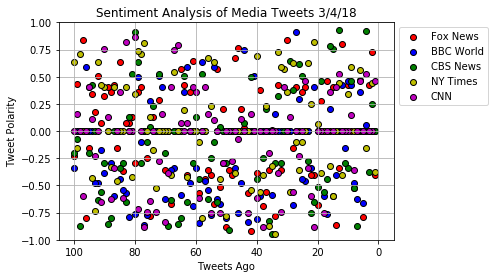

In [20]:
fox = plt.scatter(df['@FoxNews']["Tweets Ago"], df['@FoxNews']["Compound"] , marker="o", color="r", edgecolors="black", label = "Fox News")
bbc = plt.scatter(df['@BBCWorld']["Tweets Ago"], df['@BBCWorld']["Compound"] , marker="o", color="b", edgecolors="black", label = "BBC World")
cbs = plt.scatter(df['@CBSNews']["Tweets Ago"], df['@CBSNews']["Compound"] , marker="o", color="g", edgecolors="black", label = "CBS News")
nytimes = plt.scatter(df['@nytimes']["Tweets Ago"], df['@nytimes']["Compound"] , marker="o", color="y", edgecolors="black", label = "NY Times")
cnn = plt.scatter(df['@CNN']["Tweets Ago"], df['@CNN']["Compound"] , marker="o", color="m", edgecolors="black", label = "CNN")

plt.xlim(max(df["@FoxNews"]["Tweets Ago"]) + 5, -5)
plt.ylim(-1,1)
plt.grid()

plt.title("Sentiment Analysis of Media Tweets 3/4/18")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

plt.legend(handles=[fox, bbc, cbs, nytimes, cnn], loc='upper left', bbox_to_anchor=(1,1))

plt.savefig("Sentiment Scatter")

plt.show()

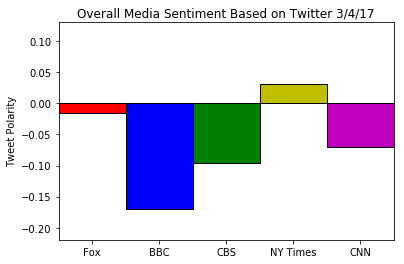

In [21]:
df_list = [df['@FoxNews'], df['@BBCWorld'], df['@CBSNews'], df['@nytimes'], df['@CNN']]
mean_list = []

for dataframe in df_list:
    mean_list.append(dataframe["Compound"].mean())

edgecolors = ["black", "black", "black", "black", "black"]
x_axis = np.arange(5)

x_ticks = ["Fox", "BBC", "CBS", "NY Times", "CNN"]
colors = ["r", "b", 'g', 'y', 'm']

tick_locations = [value+0.5 for value in x_axis]
plt.xticks(tick_locations, x_ticks)

plt.ylim(min(mean_list) - .05, max(mean_list) + .1)
plt.xlim(0,5)

news_bar = plt.bar(x_axis, mean_list, align="edge", color = colors, width = 1, edgecolor = edgecolors) 

plt.title("Overall Media Sentiment Based on Twitter 3/4/17")
plt.ylabel("Tweet Polarity")

plt.savefig("Overall Score Bar Graph")

plt.show()

In [22]:
main_df.to_csv("Twitter_Sentiment.csv")